<a href="https://colab.research.google.com/github/SrijaGuduru/SrijaGuduru/blob/main/%3C2203A51743%3E_%3C25%3E_Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement N-gram Model

Objective: Build and understand the N-gram model for text analysis.

Tasks:
•    Tokenize a sample text into words or characters.
•    Construct unigrams, bigrams, and trigrams using NLTK or custom code.
•    Compute probabilities of word sequences.

Tools/Packages: Python, NLTK.

Expected Outcome: An N-gram model for predicting the next word in a sequence.

Monday-1
Basic N-gram Language Model Implementation
Objective: Develop a basic N-gram language model for text prediction and analysis.
Requirements:
1.    Calculate_probability(sequence): Compute probability of a given word sequence
2.    generate_text(seed_words, length): Generate text based on learned N-gram probabilities
Specifications:
•    Support trigram (3-gram) model
•    Handle different corpus sizes
Deliverables:
•    Source code [use filename as: <last 4 digits of Hall ticket No>_<BatchNo>_Lab06.ipynb
•    Upload google colab file and the link in Canvas.

Tuesday-2
N-gram Model with Performance Analysis
Objective: Implement N-gram model with advanced features and comparative analysis.
Requirements:
1.    Extend previous implementation to support:
o    Variable N-gram sizes (1-5 grams)
2.    Create comparative analysis visualization
Specifications:
•    Use scientific computing libraries (NumPy, pandas)
•    Generate performance comparison graphs
Deliverables:
•    Source code [use filename as: <last 4 digits of Hall ticket No>_<BatchNo>_Lab06.ipynb
•    Upload google colab file and the link in Canvas.

Wednesday-3
N-grams and Tokenization
Objective:
•    Understand the concept of N-grams.
•    Implement basic text preprocessing and tokenization.
Tasks:
1.    Write a Python program to read a text file and preprocess the text (convert to lowercase, remove punctuation, and tokenize into words).
2.    Implement a function to generate unigrams, bigrams, and trigrams from a given text.
3.    Display the generated N-grams along with their frequencies.
Expected Outcome:
•    A list of unigrams, bigrams, and trigrams.
•    A frequency dictionary for each type of N-gram.
Deliverables:
•    Source code [use filename as: <last 4 digits of Hall ticket No>_<BatchNo>_Lab06.ipynb
•    Upload google colab file and the link in Canvas.

Thursday-4
N-gram Model for Specific Domain Prediction
Objective: Develop a specialized N-gram model for domain-specific text prediction.
Requirements:
1.    Select a specific domain:
o    Scientific literature/Social media text/Programming language corpus
2.    Implement domain-specific N-gram model with:
o    Custom preprocessing
o    Domain-specific tokenization
o    Specialized probability estimation
Specifications:
•    Implement sophisticated preprocessing
•    Support context-aware prediction

NLTK 'punkt' tokenizer not found, using gensim instead.
5-gram Probabilities: {('this', 'is', 'sample', 'text', 'for'): 0.07692307692307693, ('is', 'sample', 'text', 'for', 'ngram'): 0.07692307692307693, ('sample', 'text', 'for', 'ngram', 'model'): 0.07692307692307693, ('text', 'for', 'ngram', 'model', 'testing'): 0.07692307692307693, ('for', 'ngram', 'model', 'testing', 'the'): 0.07692307692307693, ('ngram', 'model', 'testing', 'the', 'model'): 0.07692307692307693, ('model', 'testing', 'the', 'model', 'should'): 0.07692307692307693, ('testing', 'the', 'model', 'should', 'generate'): 0.07692307692307693, ('the', 'model', 'should', 'generate', 'words'): 0.07692307692307693, ('model', 'should', 'generate', 'words', 'based'): 0.07692307692307693, ('should', 'generate', 'words', 'based', 'on'): 0.07692307692307693, ('generate', 'words', 'based', 'on', 'learned'): 0.07692307692307693, ('words', 'based', 'on', 'learned', 'probabilities'): 0.07692307692307693}


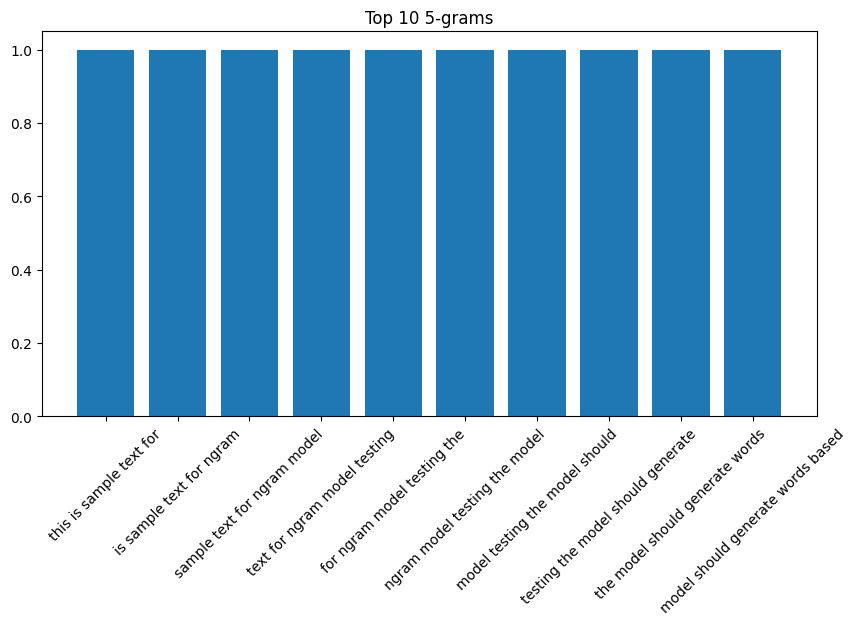

Generated Sentence: this is sample


In [7]:
import nltk
import os
import re
import random
import numpy as np
import pandas as pd
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from gensim.utils import simple_preprocess

# Ensure required libraries are installed
try:
    import nltk
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import pyarrow  # To prevent pandas warning
except ModuleNotFoundError as e:
                        print(f"Missing module: {e.name}. Install it using: pip install {e.name}")

                        # Define a specific directory for NLTK data
                        nltk_data_dir = "/usr/local/nltk_data"
                        os.makedirs(nltk_data_dir, exist_ok=True)

                        # Set the download directory and data path
                        nltk.download('punkt', download_dir=nltk_data_dir)
                        nltk.data.path.append(nltk_data_dir)

                        # Text Preprocessing
def preprocess_text(text):
                            text = text.lower()
                            text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
                            try:
                                            tokens = word_tokenize(text)
                            except LookupError:
                                                        print("NLTK 'punkt' tokenizer not found, using gensim instead.")
                                                        tokens = simple_preprocess(text)
                                                        return tokens

                                                                    # Generate N-grams
def generate_ngrams(tokens, n):
                                                                        return list(ngrams(tokens, n))

                                                                        # Compute N-gram probabilities
def calculate_ngram_probabilities(ngrams_list):
                                                                            ngram_freq = Counter(ngrams_list)
                                                                            total_ngrams = sum(ngram_freq.values())
                                                                            probabilities = {k: v / total_ngrams for k, v in ngram_freq.items()}
                                                                            return probabilities

                                                                                        # Generate text based on N-gram model
def generate_text(seed_words, ngram_probabilities, length=10):
     seed = tuple(seed_words)
     generated_text = list(seed)

     for _ in range(length):
         possible_next = [ngram for ngram in ngram_probabilities.keys() if ngram[:-1] == seed]

         if not possible_next:
                                                                                                break

         next_ngram = random.choices(possible_next, weights=[ngram_probabilities[ng] for ng in possible_next])[0]
         generated_text.append(next_ngram[-1])
         seed = next_ngram[1:]

         return ' '.join(generated_text)

                                                                                                                                                                                    # Performance analysis visualization
def plot_ngram_frequencies(ngrams_list, title):
                   freq_dist = FreqDist(ngrams_list)
                   most_common = freq_dist.most_common(10)
                   ngrams, counts = zip(*most_common)
                   plt.figure(figsize=(10, 5))
                   plt.bar(range(len(ngrams)), counts, tick_label=[' '.join(ng) for ng in ngrams])
                   plt.xticks(rotation=45)
                   plt.title(title)
                   plt.show()

                                                                                                                                                                                                                    # Sample text
test_text = "This is a sample text for N-gram model testing. The model should generate words based on learned probabilities."
tokens = preprocess_text(test_text)

                                                                                                                                                                                                                    # Generate and analyze different N-grams
for n in range(1, 6):
      ngram_list = generate_ngrams(tokens, n)
ngram_probs = calculate_ngram_probabilities(ngram_list)
print(f"{n}-gram Probabilities:", ngram_probs)
plot_ngram_frequencies(ngram_list, f"Top 10 {n}-grams")

                                                                                                                                                                                                                                    # Generate text using a trigram model
trigram_list = generate_ngrams(tokens, 3)
trigram_probs = calculate_ngram_probabilities(trigram_list)
seed_words = ["this", "is"]
generated_sentence = generate_text(seed_words, trigram_probs, length=10)
print("Generated Sentence:", generated_sentence)
